Feature 0 : 16.527385
Feature 1 : 131.325562
Feature 2 : 0.042371
Feature 3 : 1.415216
Feature 4 : 12.778966
Feature 5 : 49.209523
Feature 6 : 13.377142
Feature 7 : 25.126440


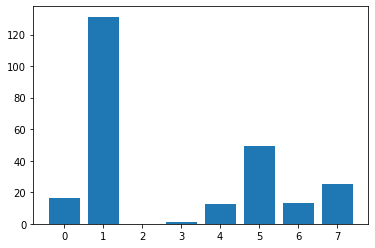

In [13]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

def load_data (filename):
    data = pd.read_csv(filename, header = None)
    df = data.values
    X= df[: ,:-1]
    y = df[:,-1]
    return X,y

def select_features(X_train,y_train,X_test):
    fs = SelectKBest(score_func= f_classif , k='all' )
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform (X_test)
    return X_train_fs,X_test_fs,fs


X,y = load_data('D:\data science portfolio\data\pima-indians-diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)
X_train_fs , X_test_test,fs = select_features(X_train, y_train, X_test)

for i in range (len(fs.scores_)):
    print('Feature %d : %f'  % (i,fs.scores_[i]))

pyplot.bar([i for i in range (len(fs.scores_))],fs.scores_)
pyplot.show()


In [19]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def load_data (filename):
    data = pd.read_csv(filename, header = None)
    df = data.values
    X= df[: ,:-1]
    y = df[:,-1]
    return X,y

def select_features(X_train,y_train,X_test):
    fs = SelectKBest(score_func= f_classif , k=4 )
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform (X_test)
    return X_train_fs,X_test_fs,fs


X,y = load_data('D:\data science portfolio\data\pima-indians-diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)
X_train_fs , X_test_fs,fs = select_features(X_train, y_train, X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs,y_train)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


In [21]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def load_data (filename):
    data = pd.read_csv(filename, header = None)
    df = data.values
    X= df[: ,:-1]
    y = df[:,-1]
    return X,y

def select_features(X_train,y_train,X_test):
    fs = SelectKBest(score_func= mutual_info_classif, k=4)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform (X_test)
    return X_train_fs,X_test_fs,fs


X,y = load_data('D:\data science portfolio\data\pima-indians-diabetes.csv')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)
X_train_fs , X_test_fs,fs = select_features(X_train, y_train, X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs,y_train)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56
